In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.nn as nn
import time

from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Flatten, Dense, Average
from tensorflow.keras.models import Sequential, Model


In [2]:
print(tf.__version__)

2.11.0


In [3]:
tf.config.list_physical_devices('GPU')

[]

#### Load Data

In [4]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['target'] = boston_dataset.target
boston.head()

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
X = boston.drop(['target'], axis=1)
y = boston['target']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
# Scaling
X_scal = StandardScaler().fit(X).transform(X)

In [9]:
X_scal

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

#### Building the network

In [10]:
layers = 20
n = 8

inputs = Input(shape=(13,))
x = Flatten()(inputs)
for i in range(layers):
    x = Dense(n)(x)
    x = nn.sigmoid(x)
outputs = Dense(1)(x)

model_g = Model(inputs=inputs, outputs=outputs)

# create an instance of the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# instantiate a loss function
loss_func = tf.keras.losses.MeanSquaredError()

bath_size = 5

grad_log=[]

# Итерируем по эпохам
epochs=2 # учим немного так как задача посмотреть что происходит с градиентом
for epoch in range(epochs):
    print(f'Начинаем эпоху {(epoch,)}')
    
    # Итерируем по пакетам в датасете
    for step, (x_batch_train, y_batch_train) in enumerate(zip(X_scal[:100,:], y[:100])):
        # Откроем GradientTape чтобы записать операции выполняемы во время прямого прохода, включающего автодифференцирование
        with tf.GradientTape() as tape:
            # Запустим прямой проход слоя. Операции применяемые слоем к своим входным данным будут записаны на GradientTape
            loggits = model_g(x_batch_train.reshape((1,13)))
            loss_value = loss_func(y, loggits)
            grads = tape.gradient(loss_value, model_g.trainable_weights)
            
            g_g=[]
        
            for g_s in grads:
                if len(g_s.numpy().shape)==1:
                    g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape)==2:
                    g_g.append(g_s.numpy()[0,0])
                if len(g_s.numpy().shape)==3:
                    g_g.append(g_s.numpy()[0,0,0])
                if len(g_s.numpy().shape)==4:
                    g_g.append(g_s.numpy()[0,0,0,0])
            grad_log.append(g_g)
            
            optimizer.apply_gradients(zip(grads,model_g.trainable_weights))
            if step % 20 == 0:
                print(f'Потери на обучении на шаге {step}: {loss_value}')
grad_log=np.array(grad_log)
print(f'Количество слоев: {len(grads)}')

Начинаем эпоху (0,)
Потери на обучении на шаге 0: 569.628662109375
Потери на обучении на шаге 20: 432.0301513671875
Потери на обучении на шаге 40: 314.1465759277344
Потери на обучении на шаге 60: 227.47381591796875
Потери на обучении на шаге 80: 171.12490844726562
Начинаем эпоху (1,)
Потери на обучении на шаге 0: 136.30062866210938
Потери на обучении на шаге 20: 115.18297576904297
Потери на обучении на шаге 40: 102.51467895507812
Потери на обучении на шаге 60: 94.98639678955078
Потери на обучении на шаге 80: 90.55215454101562
Количество слоев: 42


In [11]:
model_g.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 8)                 112       
                                                                 
 tf.math.sigmoid (TFOpLambda  (None, 8)                0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 tf.math.sigmoid_1 (TFOpLamb  (None, 8)                0         
 da)                                                         

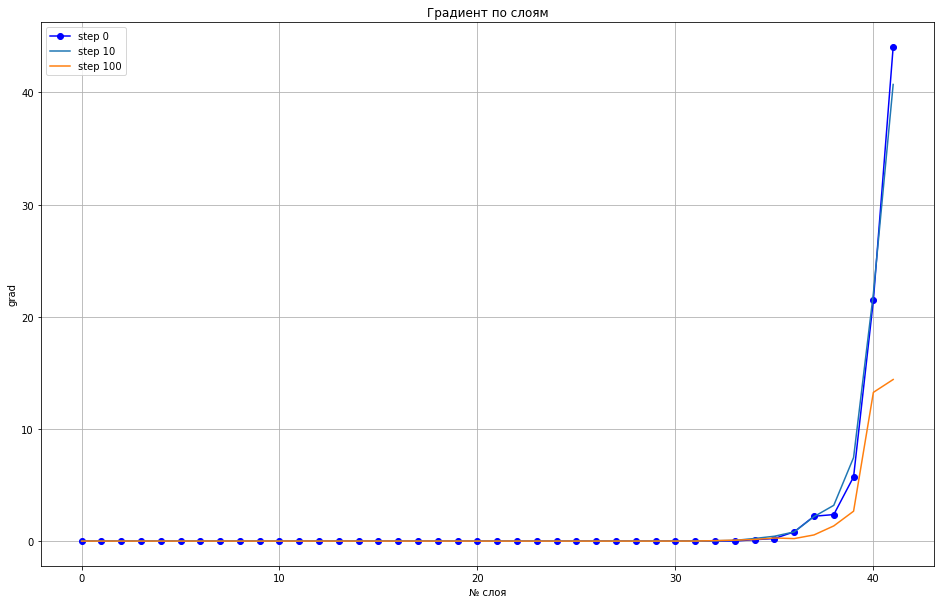

In [12]:
plt.figure(figsize=(16, 10))
plt.title('Градиент по слоям')
plt.xlabel('№ слоя')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]),'-ob',label='step 0')
plt.plot(np.abs(grad_log[10,:]),label='step 10')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
plt.legend()
plt.show()

#### Эффект исчезновения градиента наступает на -8 слое, следовательно при использование активационной функции "sigmoid" более 9 слоев брать нет смысла.

#### Попробуем использовать другую функцию активации

In [13]:
layers = 20
n = 8

inputs = Input(shape=(13,))
x = Flatten()(inputs)
for i in range(layers):
    x = Dense(n)(x)
    x = nn.relu(x)
outputs = Dense(1)(x)

model_g = Model(inputs=inputs, outputs=outputs)

# create an instance of the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# instantiate a loss function
loss_func = tf.keras.losses.MeanSquaredError()

bath_size = 5

grad_log=[]

# Итерируем по эпохам
epochs=2 # учим немного так как задача посмотреть что происходит с градиентом
for epoch in range(epochs):
    print(f'Начинаем эпоху {(epoch,)}')
    
    # Итерируем по пакетам в датасете
    for step, (x_batch_train, y_batch_train) in enumerate(zip(X_scal[:100,:], y[:100])):
        # Откроем GradientTape чтобы записать операции выполняемы во время прямого прохода, включающего автодифференцирование
        with tf.GradientTape() as tape:
            # Запустим прямой проход слоя. Операции применяемые слоем к своим входным данным будут записаны на GradientTape
            loggits = model_g(x_batch_train.reshape((1,13)))
            loss_value = loss_func(y, loggits)
            grads = tape.gradient(loss_value, model_g.trainable_weights)
            
            g_g=[]
            for g_s in grads:
                if len(g_s.numpy().shape)==1:
                    g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape)==2:
                    g_g.append(g_s.numpy()[0,0])
                if len(g_s.numpy().shape)==3:
                    g_g.append(g_s.numpy()[0,0,0])
                if len(g_s.numpy().shape)==4:
                    g_g.append(g_s.numpy()[0,0,0,0])
            grad_log.append(g_g)
            
            optimizer.apply_gradients(zip(grads,model_g.trainable_weights))
            if step % 20 == 0:
                print(f'Потери на обучении на шаге {step}: {loss_value}')
grad_log=np.array(grad_log)

Начинаем эпоху (0,)
Потери на обучении на шаге 0: 592.1466064453125
Потери на обучении на шаге 20: 394.200439453125
Потери на обучении на шаге 40: 84.41954803466797
Потери на обучении на шаге 60: 84.4195556640625
Потери на обучении на шаге 80: 84.41954803466797
Начинаем эпоху (1,)
Потери на обучении на шаге 0: 84.41954803466797
Потери на обучении на шаге 20: 84.41956329345703
Потери на обучении на шаге 40: 84.41954803466797
Потери на обучении на шаге 60: 84.4195556640625
Потери на обучении на шаге 80: 84.41954803466797


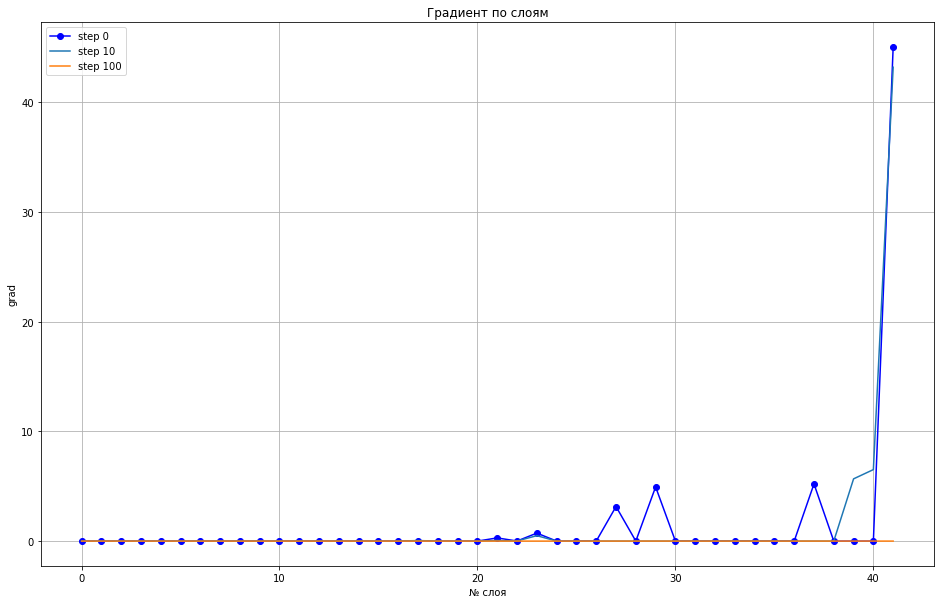

In [14]:
plt.figure(figsize=(16, 10))
plt.title('Градиент по слоям')
plt.xlabel('№ слоя')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]),'-ob',label='step 0')
plt.plot(np.abs(grad_log[10,:]),label='step 10')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
plt.legend()
plt.show()

#### Таким образом при изменении функции активации ("relu") мы можем увеличить глубину сети, в данном случае до 20 слоя

In [15]:
layers = 20
n = 8

inputs = Input(shape=(13,))
x = Flatten()(inputs)
for i in range(layers):
    x = Dense(n)(x)
    x = nn.tanh(x)
outputs = Dense(1, activation='sigmoid')(x)

model_g = Model(inputs=inputs, outputs=outputs)

# create an instance of the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# instantiate a loss function
loss_func = tf.keras.losses.MeanSquaredError()

bath_size = 5

grad_log=[]

# Итерируем по эпохам
epochs=2 # учим немного так как задача посмотреть что происходит с градиентом
for epoch in range(epochs):
    print(f'Начинаем эпоху {(epoch,)}')
    
    # Итерируем по пакетам в датасете
    for step, (x_batch_train, y_batch_train) in enumerate(zip(X_scal[:100,:], y[:100])):
        # Откроем GradientTape чтобы записать операции выполняемы во время прямого прохода, включающего автодифференцирование
        with tf.GradientTape() as tape:
            # Запустим прямой проход слоя. Операции применяемые слоем к своим входным данным будут записаны на GradientTape
            loggits = model_g(x_batch_train.reshape((1,13)))
            loss_value = loss_func(y, loggits)
            grads = tape.gradient(loss_value, model_g.trainable_weights)
            
            g_g=[]
            for g_s in grads:
                if len(g_s.numpy().shape)==1:
                    g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape)==2:
                    g_g.append(g_s.numpy()[0,0])
                if len(g_s.numpy().shape)==3:
                    g_g.append(g_s.numpy()[0,0,0])
                if len(g_s.numpy().shape)==4:
                    g_g.append(g_s.numpy()[0,0,0,0])
            grad_log.append(g_g)
            
            optimizer.apply_gradients(zip(grads,model_g.trainable_weights))
            if step % 20 == 0:
                print(f'Потери на обучении на шаге {step}: {loss_value}')
grad_log=np.array(grad_log)

Начинаем эпоху (0,)
Потери на обучении на шаге 0: 570.3493041992188
Потери на обучении на шаге 20: 556.8552856445312
Потери на обучении на шаге 40: 552.8184204101562
Потери на обучении на шаге 60: 551.1390380859375
Потери на обучении на шаге 80: 550.3076171875
Начинаем эпоху (1,)
Потери на обучении на шаге 0: 549.816162109375
Потери на обучении на шаге 20: 549.4970092773438
Потери на обучении на шаге 40: 549.2794799804688
Потери на обучении на шаге 60: 549.111083984375
Потери на обучении на шаге 80: 548.984130859375


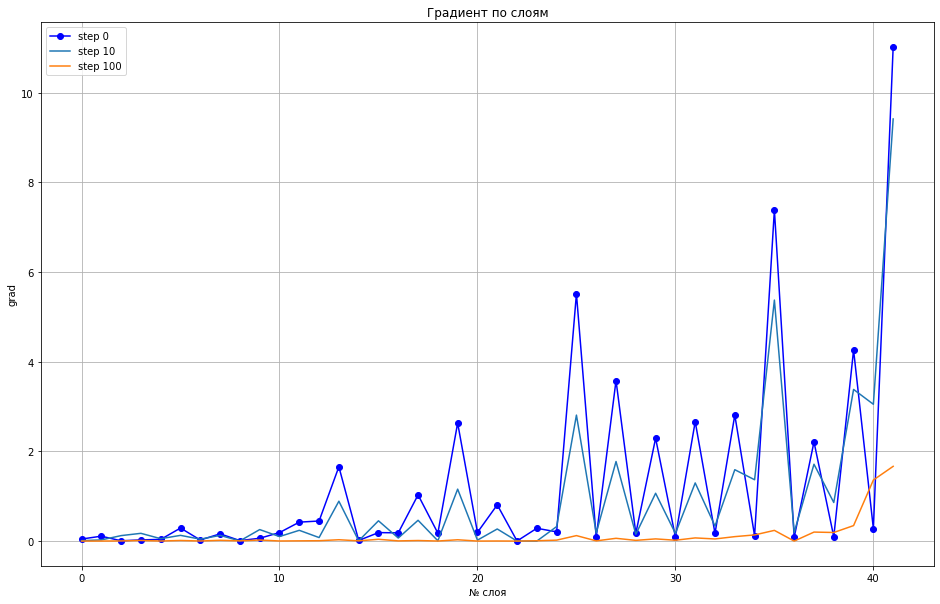

In [16]:
plt.figure(figsize=(16, 10))
plt.title('Градиент по слоям')
plt.xlabel('№ слоя')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]),'-ob',label='step 0')
plt.plot(np.abs(grad_log[10,:]),label='step 10')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
plt.legend()
plt.show()

#### При использование функции активации ("tanh") необходимо создавать более глубокие сети для снижения потерь, эффекта исчезновения градиента здесь не наблюдается.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size = 0.3, random_state=0)

##### Рассмотрим 8-слойную сеть (рассматривать более глубокую сеть при использование функции активации 'sigmoid' не имеет смысла, так как наблюдается эффект затухания градиента)

___________________________________________________ 
Layers: 8, 
neurons: 8, 
activation function: relu, 
optimizer: RMSprop
___________________________________________________ 
Layers: 8, 
neurons: 8, 
activation function: relu, 
optimizer: Adam
___________________________________________________ 
Layers: 8, 
neurons: 8, 
activation function: relu, 
optimizer: Nadam
___________________________________________________ 
Layers: 8, 
neurons: 8, 
activation function: sigmoid, 
optimizer: RMSprop
___________________________________________________ 
Layers: 8, 
neurons: 8, 
activation function: sigmoid, 
optimizer: Adam
___________________________________________________ 
Layers: 8, 
neurons: 8, 
activation function: sigmoid, 
optimizer: Nadam
___________________________________________________ 
Layers: 8, 
neurons: 8, 
activation function: tanh, 
optimizer: RMSprop
___________________________________________________ 
Layers: 8, 
neurons: 8, 
activation function: tanh, 
optimizer: Adam
____

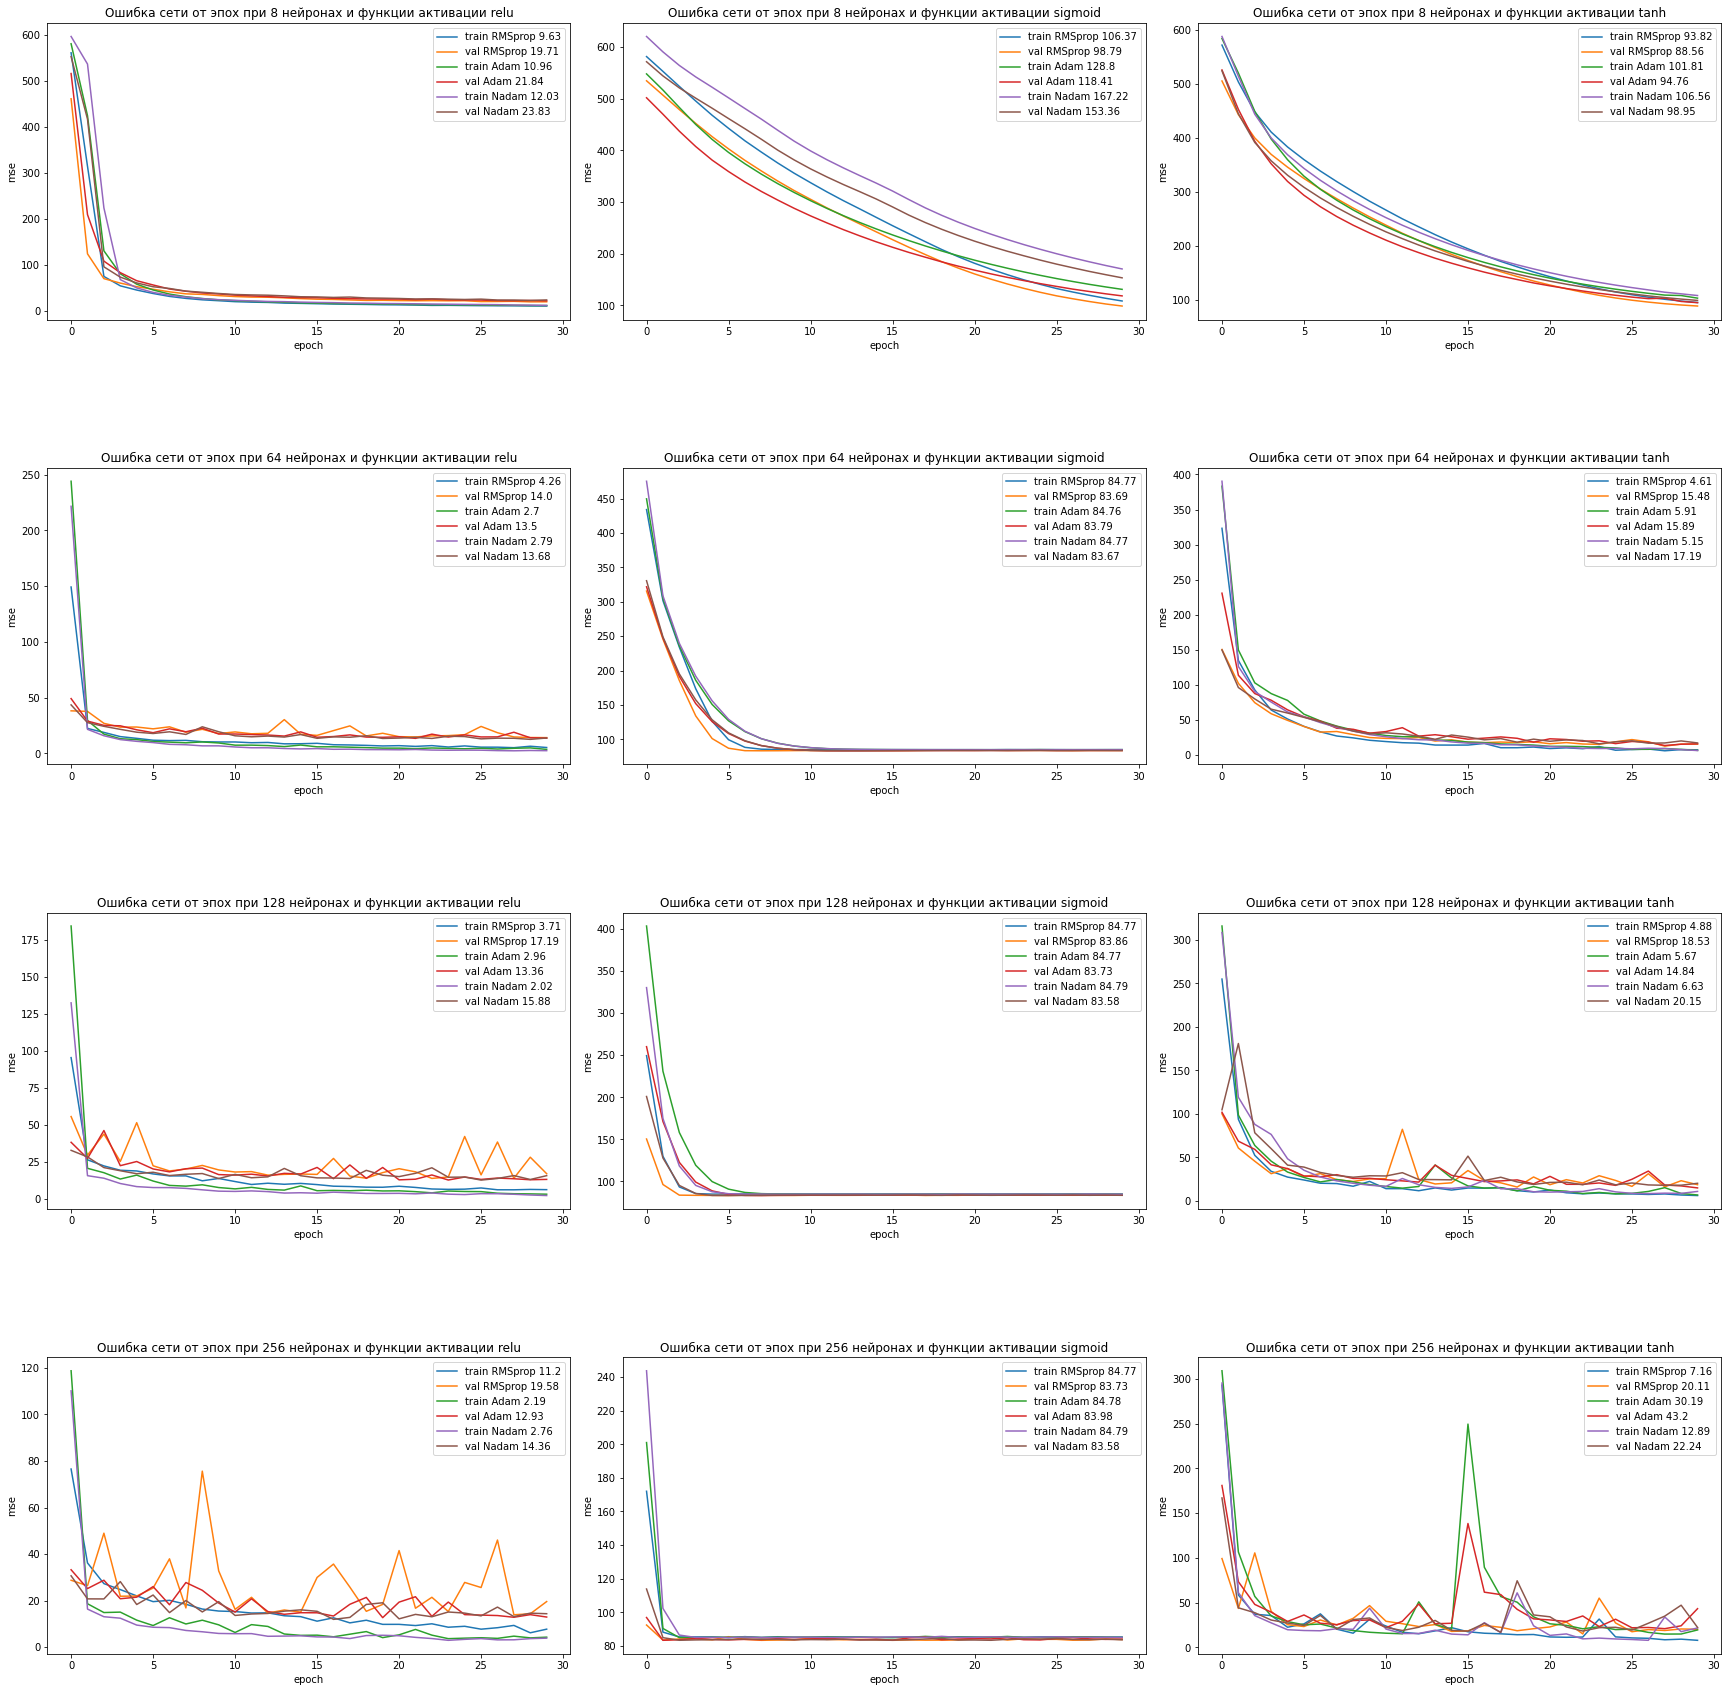

In [18]:
layers = 8
epochs = 30
batch_size=5
fig_block = 0
result = pd.DataFrame()
res_layers = []
res_num_n = []
res_activation_func = []
res_optimizer = []
train_mse = [] # ошибка на тренировочной выборке
test_mse = [] # ошибка на тестовой выборке

# instantiate a loss function
loss_func = tf.keras.losses.MeanSquaredError()

fig = plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for num_n in [8, 64, 128, 256]:
    for activation_func in ['relu', 'sigmoid', 'tanh']:
        fig_block += 1
        ax = fig.add_subplot(4, 3, fig_block)
        for optimizer_alg in ['RMSprop', 'Adam', 'Nadam']:
            res_layers.append(layers)
            res_num_n.append(num_n)
            res_activation_func.append(activation_func)
            res_optimizer.append(optimizer_alg)
            
            inputs = Input(shape=(13,))
            x=Flatten()(inputs)
            for i in range(layers-2):
                x=Dense(num_n, activation=activation_func)(x)
            outputs = Dense(1)(x)
            model = Model(inputs=inputs, outputs=outputs)
            model.compile(optimizer=optimizer_alg, loss=loss_func, metrics=['mse'])
            
            print(f'___________________________________________________', 
                  f'\nLayers: {layers},',
                  f'\nneurons: {num_n},',
                  f'\nactivation function: {activation_func},',
                  f'\noptimizer: {optimizer_alg}')
            
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                                validation_data=(X_test, y_test), verbose=0)
            
            train_loss, train_m = model.evaluate(X_train, y_train, verbose=0)
            test_loss, test_m = model.evaluate(X_test, y_test, verbose=0)
            train_mse.append(train_m)
            test_mse.append(test_m)
            
            ax.set_xlabel('epoch')
            ax.set_ylabel('mse')
            ax.set(title = f'Ошибка сети от эпох при {num_n} нейронах и функции активации {activation_func}')
            ax.plot(history.history['mse'], label=f'train {optimizer_alg} {round(train_m,2)}')   
            ax.plot(history.history['val_mse'], label=f'val {optimizer_alg} {round(test_m,2)}')
            ax.legend()
plt.show()


##### Рассмотрим 10-слойную сеть (рассматривать имеет смысл для функции активации отличной от 'sigmoid')

___________________________________________________ 
Layers: 10, 
neurons: 8, 
activation function: relu, 
optimizer: RMSprop
___________________________________________________ 
Layers: 10, 
neurons: 8, 
activation function: relu, 
optimizer: Adam
___________________________________________________ 
Layers: 10, 
neurons: 8, 
activation function: relu, 
optimizer: Nadam
___________________________________________________ 
Layers: 10, 
neurons: 8, 
activation function: tanh, 
optimizer: RMSprop
___________________________________________________ 
Layers: 10, 
neurons: 8, 
activation function: tanh, 
optimizer: Adam
___________________________________________________ 
Layers: 10, 
neurons: 8, 
activation function: tanh, 
optimizer: Nadam
___________________________________________________ 
Layers: 10, 
neurons: 64, 
activation function: relu, 
optimizer: RMSprop
___________________________________________________ 
Layers: 10, 
neurons: 64, 
activation function: relu, 
optimizer: Adam
___

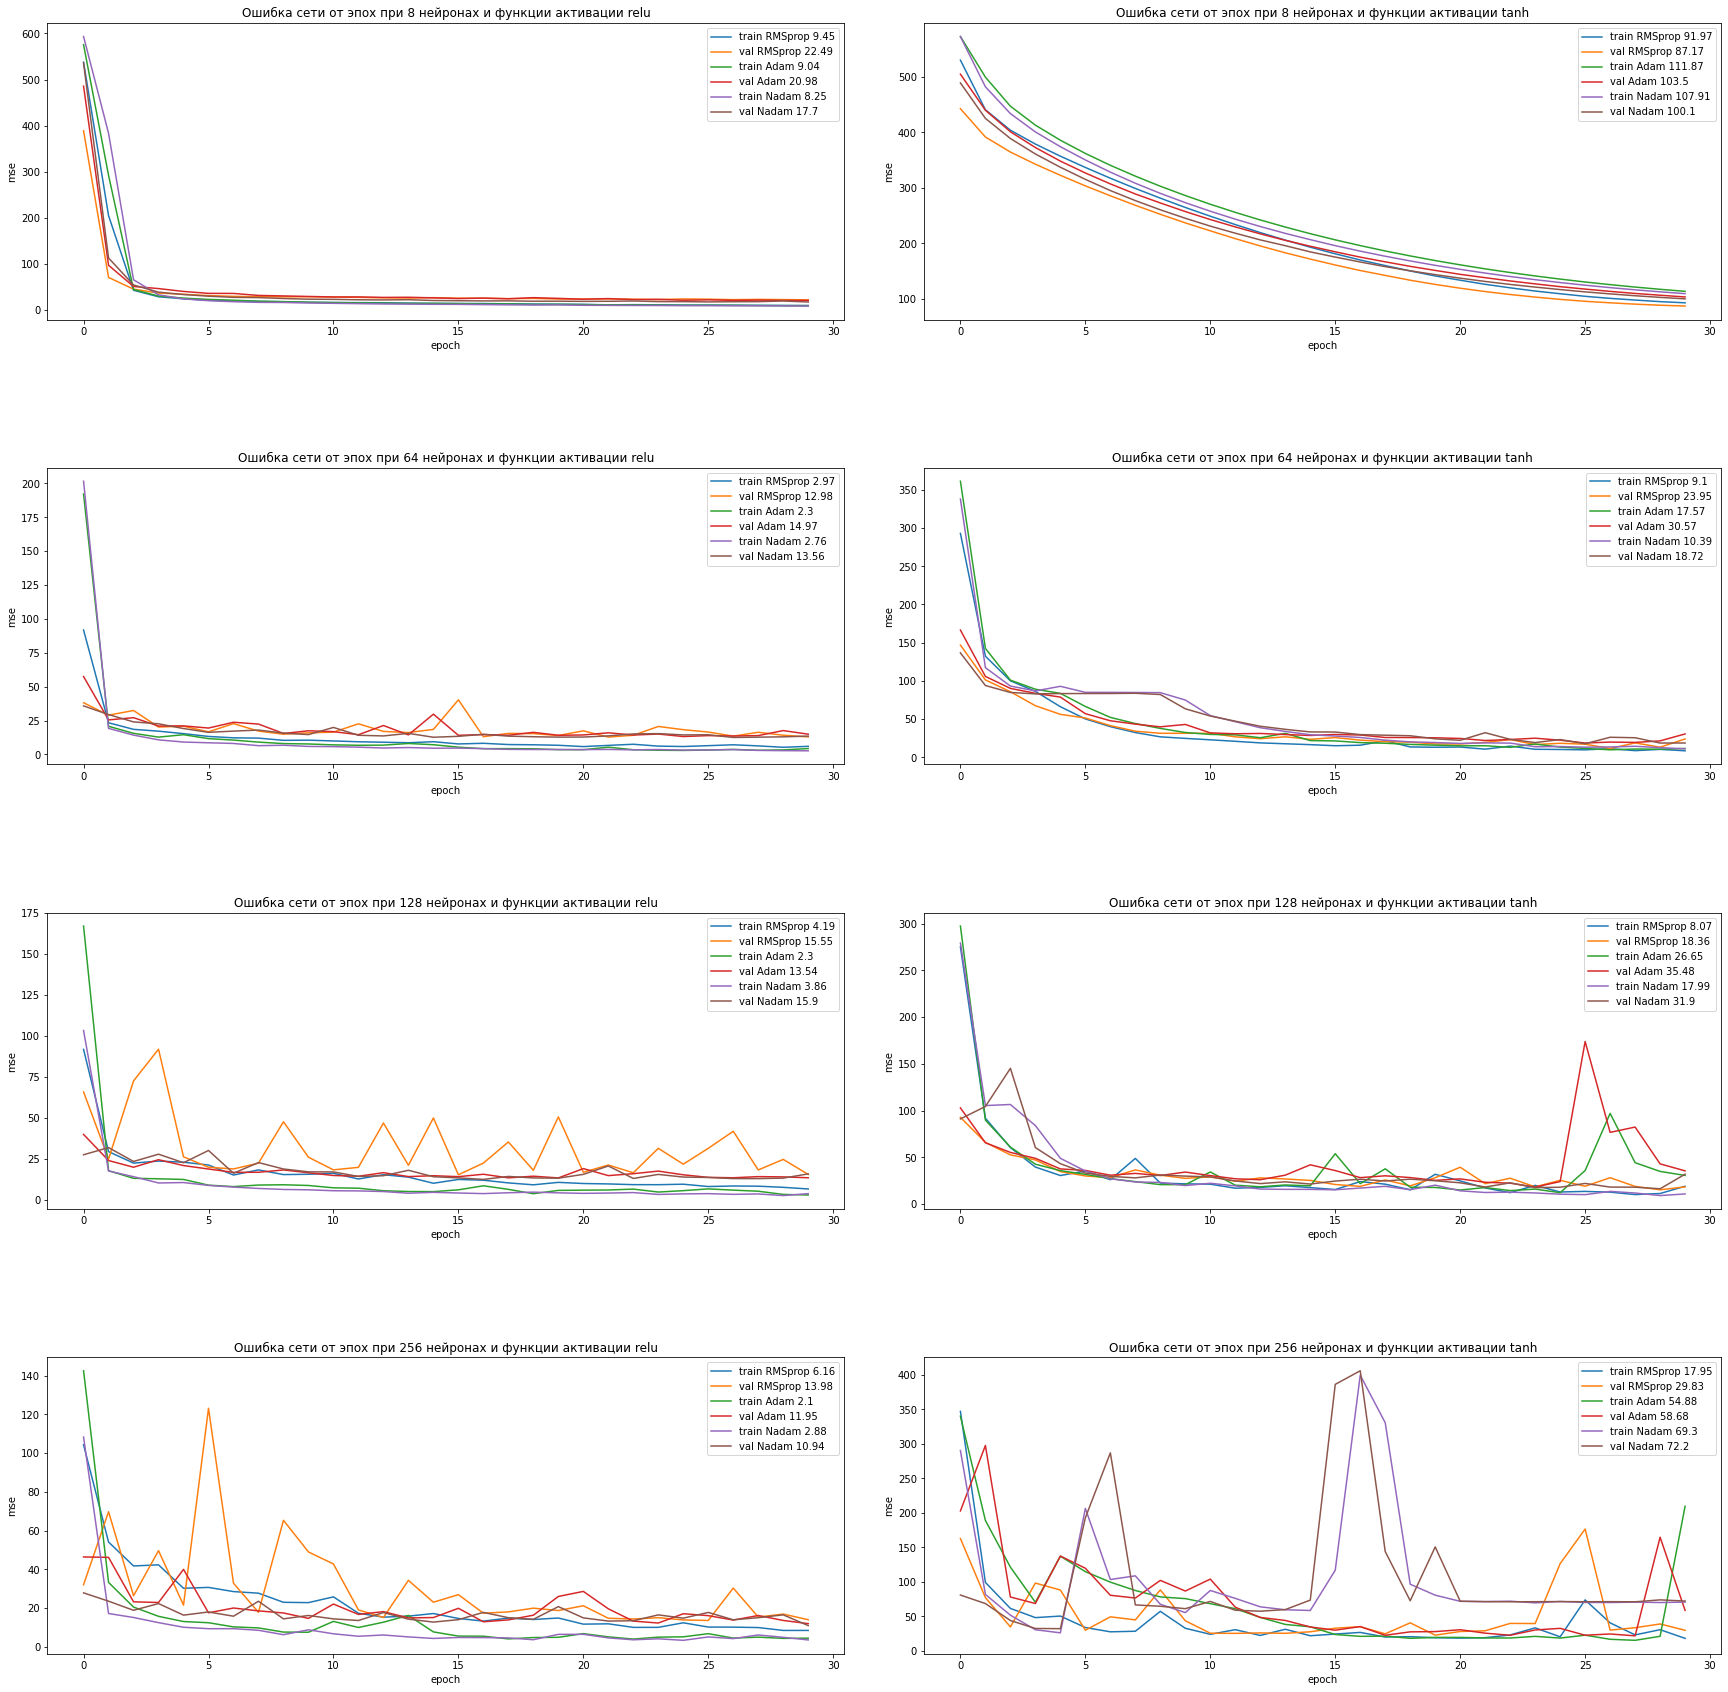

In [19]:
layers = 10
fig_block = 0

fig = plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for num_n in [8, 64, 128, 256]:
    for activation_func in ['relu', 'tanh']:
        fig_block += 1
        ax = fig.add_subplot(4, 2, fig_block)
        for optimizer_alg in ['RMSprop', 'Adam', 'Nadam']:
            res_layers.append(layers)
            res_num_n.append(num_n)
            res_activation_func.append(activation_func)
            res_optimizer.append(optimizer_alg)
            
            inputs = Input(shape=(13,))
            x=Flatten()(inputs)
            for i in range(layers-2):
                x=Dense(num_n, activation=activation_func)(x)
            outputs = Dense(1)(x)
            model = Model(inputs=inputs, outputs=outputs)
            model.compile(optimizer=optimizer_alg, loss=loss_func, metrics=['mse'])
            
            print(f'___________________________________________________', 
                  f'\nLayers: {layers},',
                  f'\nneurons: {num_n},',
                  f'\nactivation function: {activation_func},',
                  f'\noptimizer: {optimizer_alg}')
            
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                                validation_data=(X_test, y_test), verbose=0)
            
            train_loss, train_m = model.evaluate(X_train, y_train, verbose=0)
            test_loss, test_m = model.evaluate(X_test, y_test, verbose=0)
            train_mse.append(train_m)
            test_mse.append(test_m)
            
            ax.set_xlabel('epoch')
            ax.set_ylabel('mse')
            ax.set(title = f'Ошибка сети от эпох при {num_n} нейронах и функции активации {activation_func}')
            ax.plot(history.history['mse'], label=f'train {optimizer_alg} {round(train_m,2)}')   
            ax.plot(history.history['val_mse'], label=f'val {optimizer_alg} {round(test_m,2)}')
            ax.legend()
plt.show()

#### Рассмотрим 12-слойную сеть (в основном рассматриваем для функции активации 'relu')

___________________________________________________ 
Layers: 12, 
neurons: 8, 
activation function: relu, 
optimizer: RMSprop
___________________________________________________ 
Layers: 12, 
neurons: 8, 
activation function: relu, 
optimizer: Adam
___________________________________________________ 
Layers: 12, 
neurons: 8, 
activation function: relu, 
optimizer: Nadam
___________________________________________________ 
Layers: 12, 
neurons: 8, 
activation function: tanh, 
optimizer: RMSprop
___________________________________________________ 
Layers: 12, 
neurons: 8, 
activation function: tanh, 
optimizer: Adam
___________________________________________________ 
Layers: 12, 
neurons: 8, 
activation function: tanh, 
optimizer: Nadam
___________________________________________________ 
Layers: 12, 
neurons: 64, 
activation function: relu, 
optimizer: RMSprop
___________________________________________________ 
Layers: 12, 
neurons: 64, 
activation function: relu, 
optimizer: Adam
___

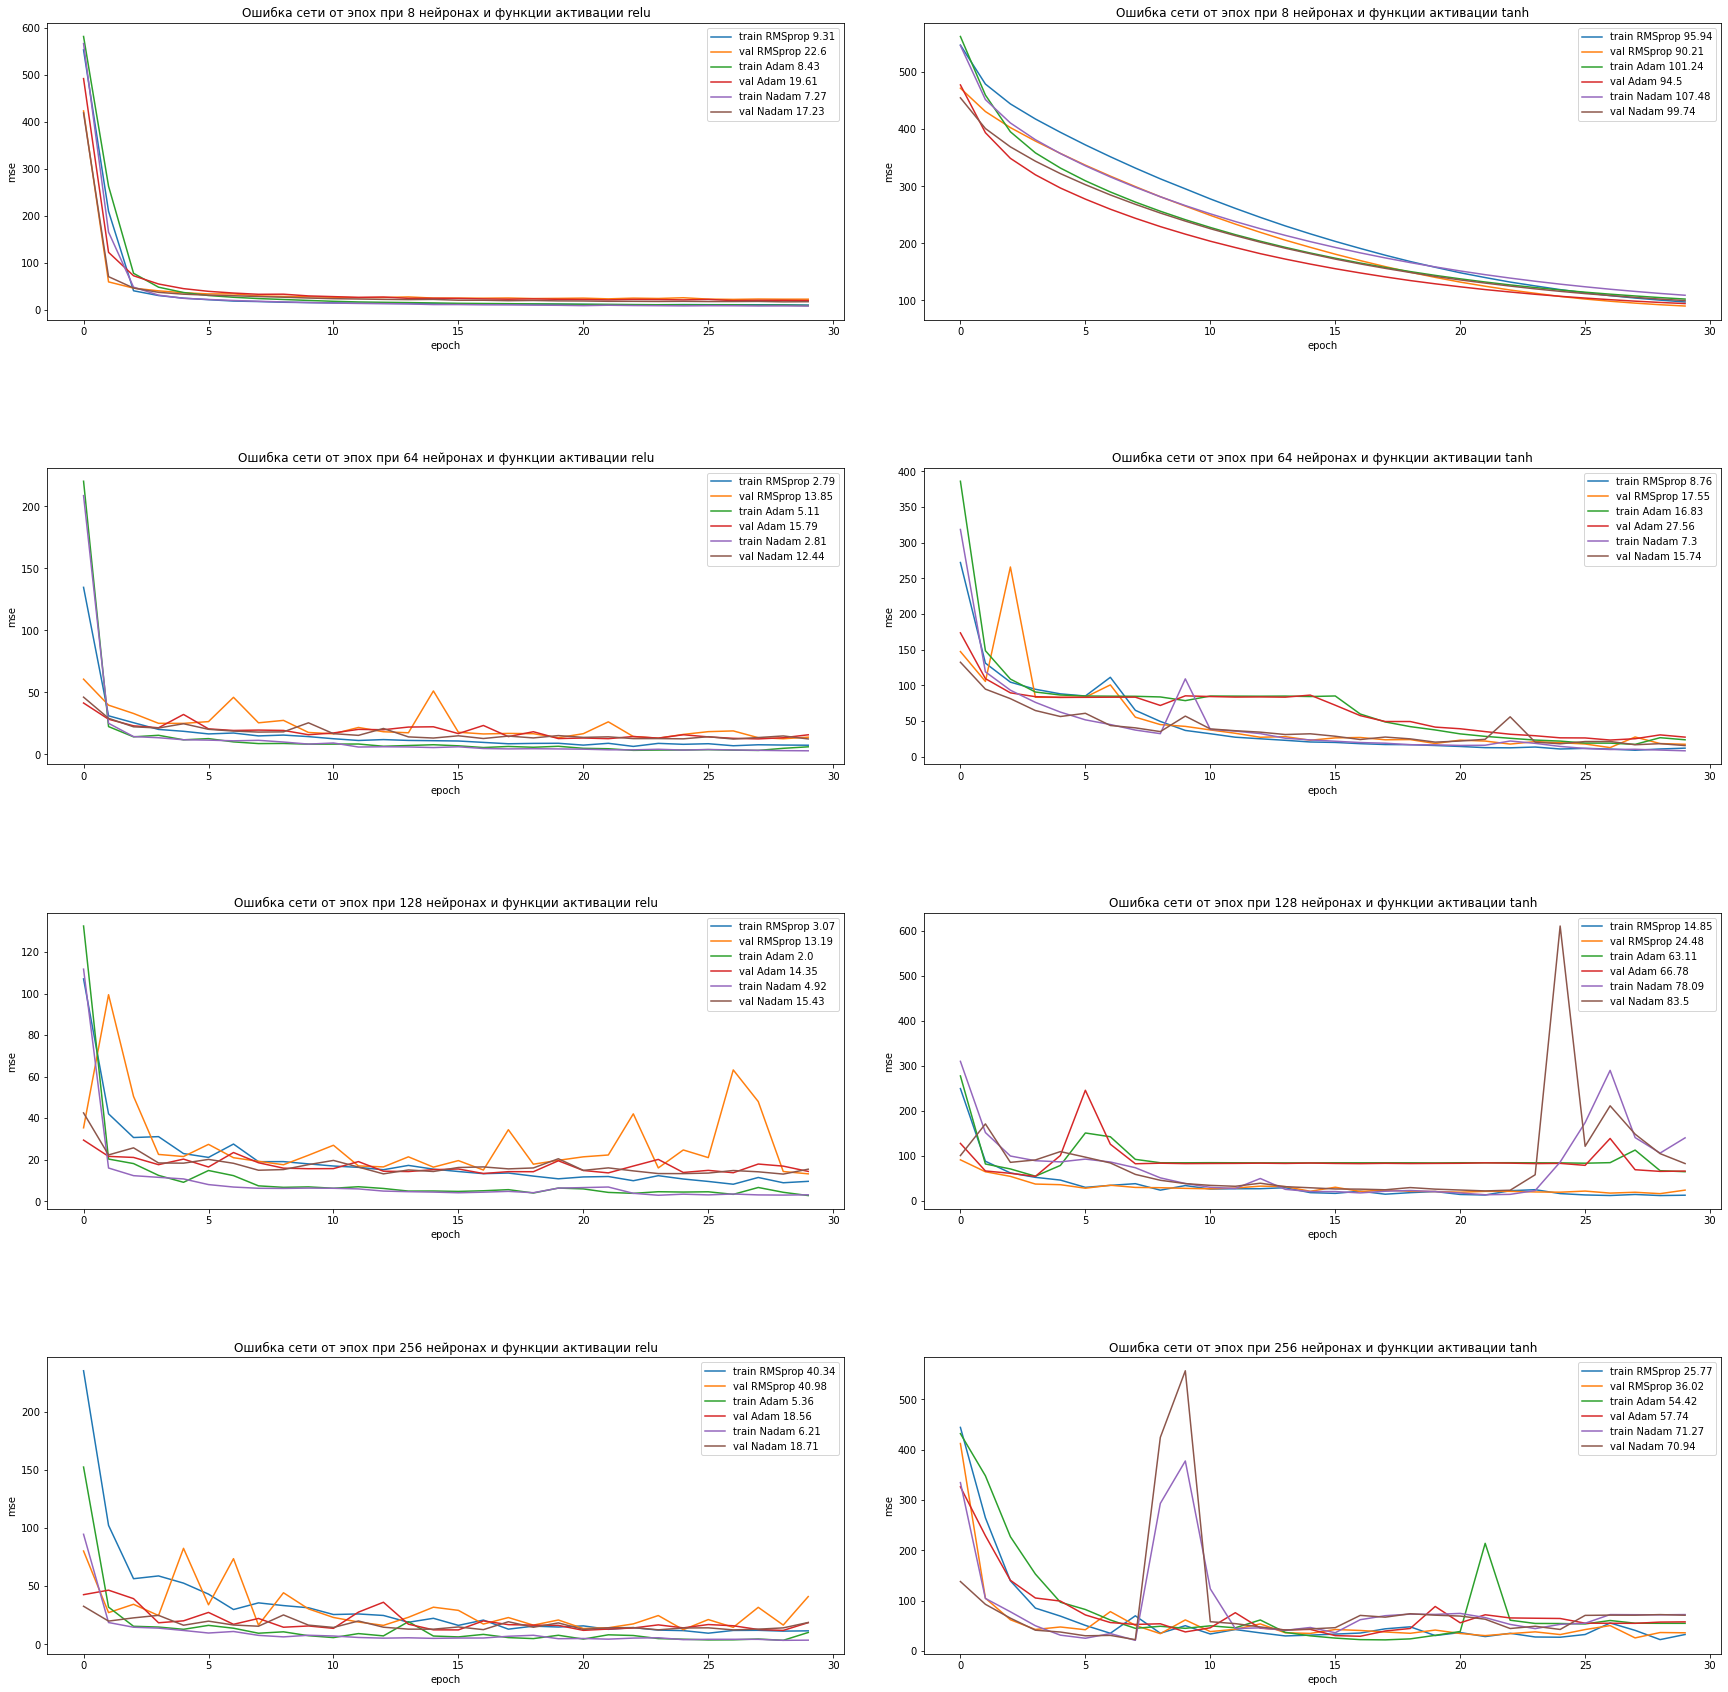

In [20]:
layers = 12
fig_block = 0

fig = plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for num_n in [8, 64, 128, 256]:
    for activation_func in ['relu','tanh']:
        fig_block += 1
        ax = fig.add_subplot(4, 2, fig_block)
        for optimizer_alg in ['RMSprop', 'Adam', 'Nadam']:
            res_layers.append(layers)
            res_num_n.append(num_n)
            res_activation_func.append(activation_func)
            res_optimizer.append(optimizer_alg)
            
            inputs = Input(shape=(13,))
            x=Flatten()(inputs)
            for i in range(layers-2):
                x=Dense(num_n, activation=activation_func)(x)
            outputs = Dense(1)(x)
            model = Model(inputs=inputs, outputs=outputs)
            model.compile(optimizer=optimizer_alg, loss=loss_func, metrics=['mse'])
            
            print(f'___________________________________________________', 
                  f'\nLayers: {layers},',
                  f'\nneurons: {num_n},',
                  f'\nactivation function: {activation_func},',
                  f'\noptimizer: {optimizer_alg}')
            
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                                validation_data=(X_test, y_test), verbose=0)
            
            train_loss, train_m = model.evaluate(X_train, y_train, verbose=0)
            test_loss, test_m = model.evaluate(X_test, y_test, verbose=0)
            train_mse.append(train_m)
            test_mse.append(test_m)
            
            ax.set_xlabel('epoch')
            ax.set_ylabel('mse')
            ax.set(title = f'Ошибка сети от эпох при {num_n} нейронах и функции активации {activation_func}')
            ax.plot(history.history['mse'], label=f'train {optimizer_alg} {round(train_m,2)}')   
            ax.plot(history.history['val_mse'], label=f'val {optimizer_alg} {round(test_m,2)}')
            ax.legend()
plt.show()

#### Рассмотрим 20-слойную сеть для функции активации 'relu'

___________________________________________________ 
Layers: 20, 
neurons: 8, 
activation function: relu, 
optimizer: RMSprop
___________________________________________________ 
Layers: 20, 
neurons: 8, 
activation function: relu, 
optimizer: Adam
___________________________________________________ 
Layers: 20, 
neurons: 8, 
activation function: relu, 
optimizer: Nadam
___________________________________________________ 
Layers: 20, 
neurons: 64, 
activation function: relu, 
optimizer: RMSprop
___________________________________________________ 
Layers: 20, 
neurons: 64, 
activation function: relu, 
optimizer: Adam
___________________________________________________ 
Layers: 20, 
neurons: 64, 
activation function: relu, 
optimizer: Nadam
___________________________________________________ 
Layers: 20, 
neurons: 128, 
activation function: relu, 
optimizer: RMSprop
___________________________________________________ 
Layers: 20, 
neurons: 128, 
activation function: relu, 
optimizer: Ada

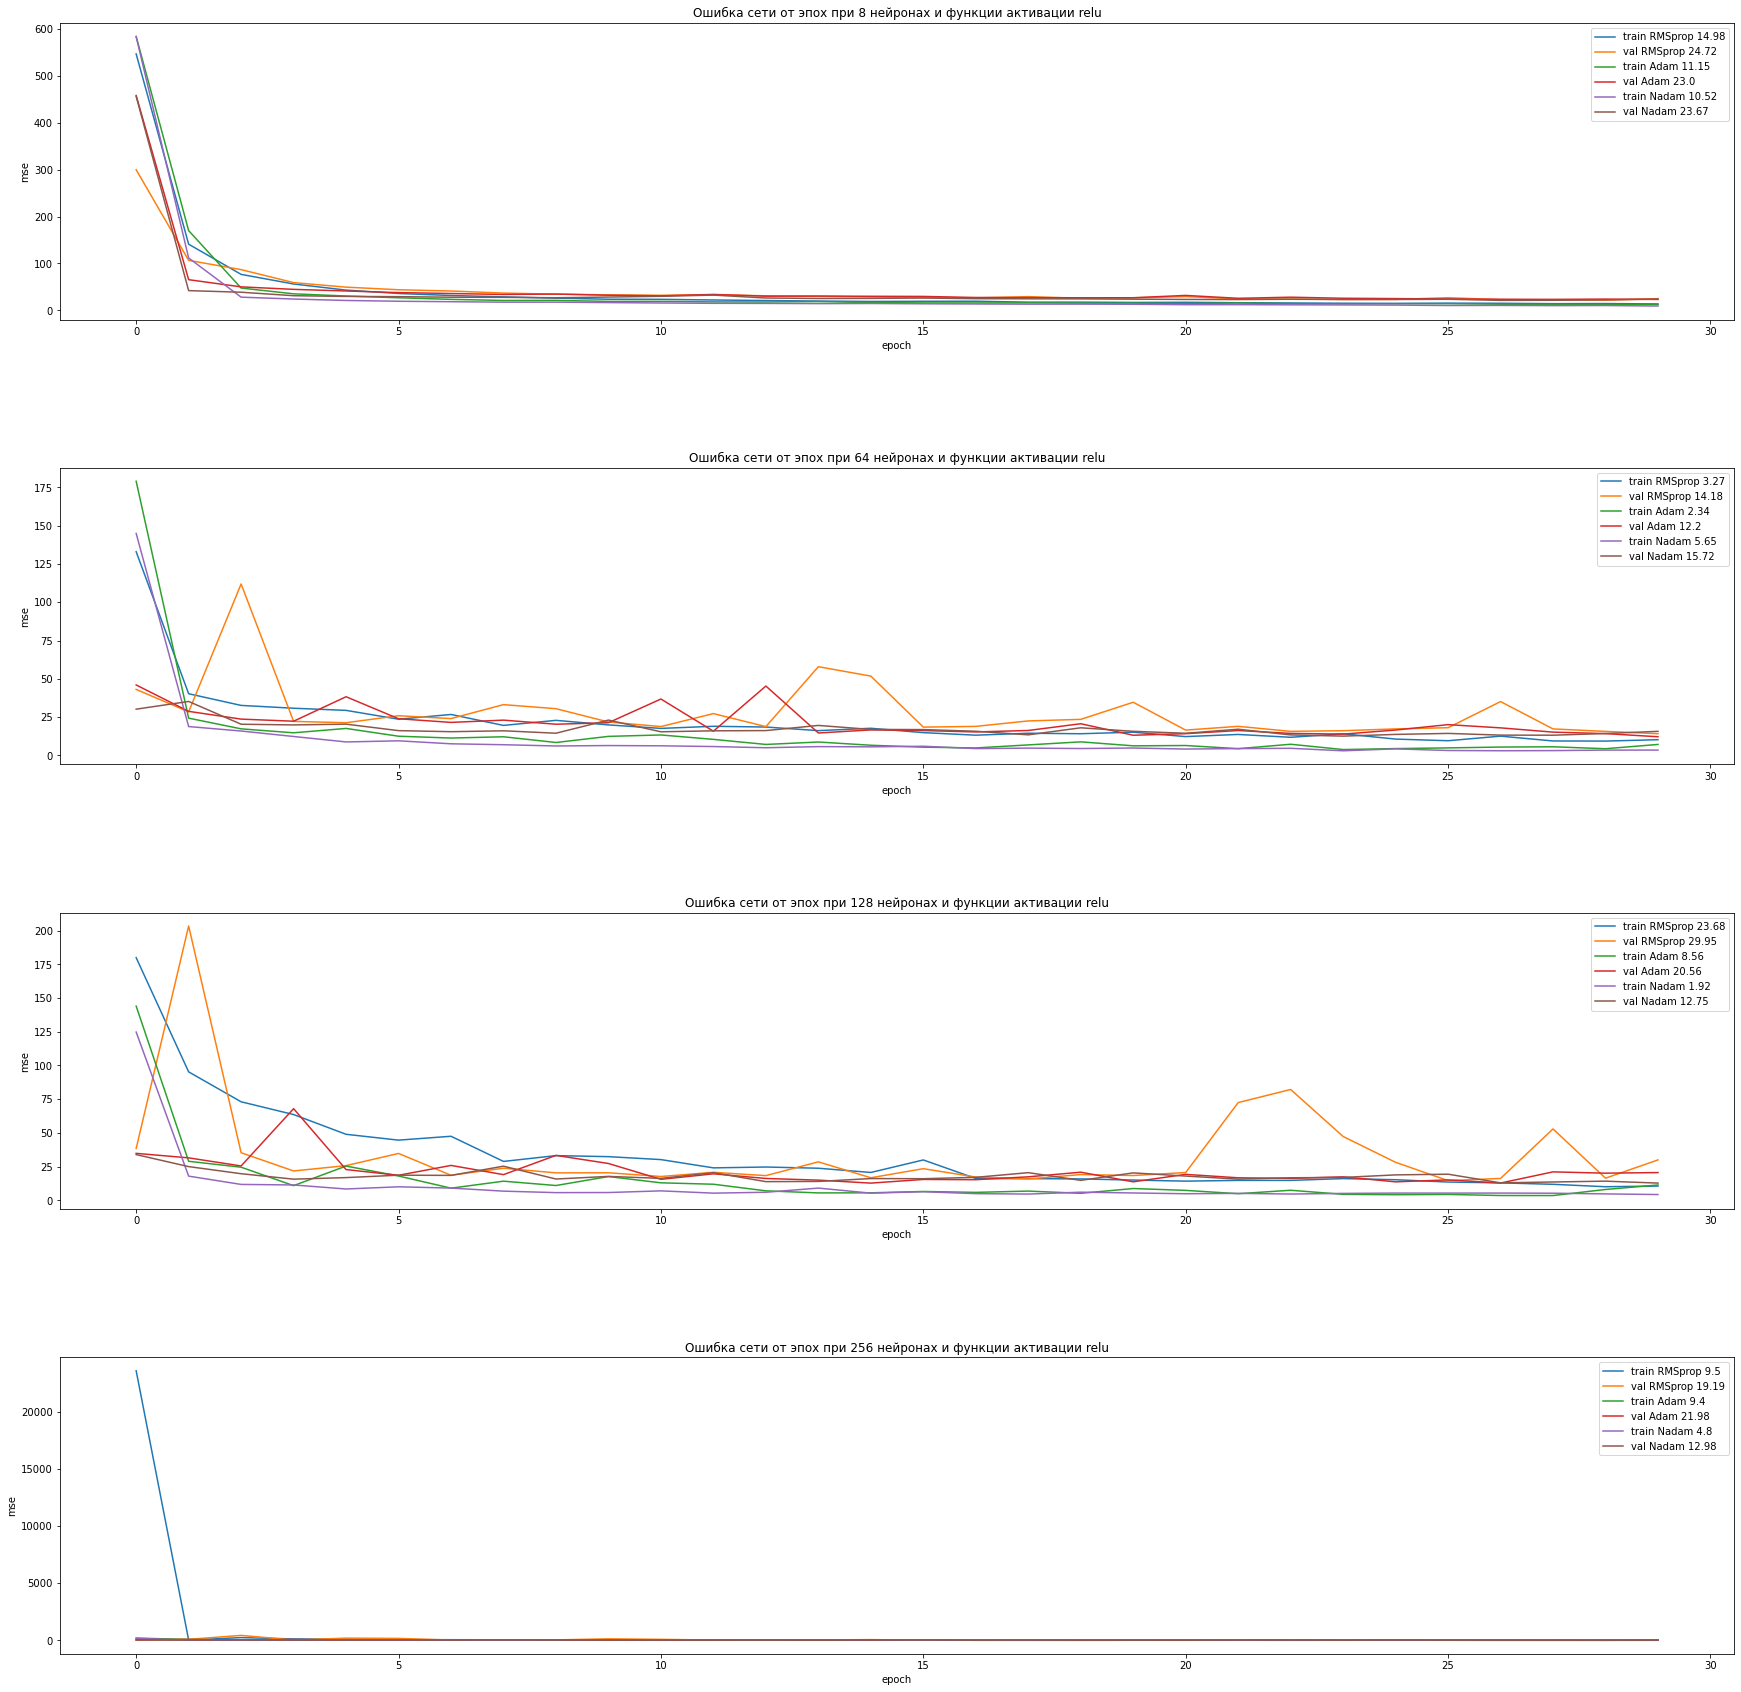

In [21]:
layers = 20
fig_block = 0

fig = plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for num_n in [8, 64, 128, 256]:
    for activation_func in ['relu']:
        fig_block += 1
        ax = fig.add_subplot(4, 1, fig_block)
        for optimizer_alg in ['RMSprop', 'Adam', 'Nadam']:
            res_layers.append(layers)
            res_num_n.append(num_n)
            res_activation_func.append(activation_func)
            res_optimizer.append(optimizer_alg)
            
            inputs = Input(shape=(13,))
            x=Flatten()(inputs)
            for i in range(layers-2):
                x=Dense(num_n, activation=activation_func)(x)
            outputs = Dense(1)(x)
            model = Model(inputs=inputs, outputs=outputs)
            model.compile(optimizer=optimizer_alg, loss=loss_func, metrics=['mse'])
            
            print(f'___________________________________________________', 
                  f'\nLayers: {layers},',
                  f'\nneurons: {num_n},',
                  f'\nactivation function: {activation_func},',
                  f'\noptimizer: {optimizer_alg}')
            
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                                validation_data=(X_test, y_test), verbose=0)
            
            train_loss, train_m = model.evaluate(X_train, y_train, verbose=0)
            test_loss, test_m = model.evaluate(X_test, y_test, verbose=0)
            train_mse.append(train_m)
            test_mse.append(test_m)
            
            ax.set_xlabel('epoch')
            ax.set_ylabel('mse')
            ax.set(title = f'Ошибка сети от эпох при {num_n} нейронах и функции активации {activation_func}')
            ax.plot(history.history['mse'], label=f'train {optimizer_alg} {round(train_m,2)}')   
            ax.plot(history.history['val_mse'], label=f'val {optimizer_alg} {round(test_m,2)}')
            ax.legend()
plt.show()

In [22]:
result['layers'] = res_layers
result['num_neuron'] = res_num_n
result['activation_func'] = res_activation_func
result['optimizer'] = res_optimizer
result['train_mse'] = train_mse
result['test_mse'] = test_mse
result['test_train'] = result['test_mse'] - result['train_mse']
result.sort_values(by=['test_mse'], axis=0, ascending=True, inplace=True)

In [23]:
result.head(20)

,layers,num_neuron,activation_func,optimizer,train_mse,test_mse,test_train
56,10,256,relu,Nadam,2.881667,10.941353,8.059685
55,10,256,relu,Adam,2.098217,11.950994,9.852778
88,20,64,relu,Adam,2.340951,12.195783,9.854832
68,12,64,relu,Nadam,2.808083,12.441734,9.633651
92,20,128,relu,Nadam,1.918723,12.749286,10.830563
28,8,256,relu,Adam,2.192034,12.929112,10.737079
42,10,64,relu,RMSprop,2.971023,12.979289,10.008266
95,20,256,relu,Nadam,4.803300,12.983807,8.180506
72,12,128,relu,RMSprop,3.073217,13.193275,10.120059
19,8,128,relu,Adam,2.962521,13.357938,10.395417


___________________________________________________ 
Layers: 12, 
neurons: 128, 
activation function: relu 
optimizer: Nadam 
learning_rate:0.001
___________________________________________________ 
Layers: 12, 
neurons: 128, 
activation function: relu 
optimizer: Nadam 
learning_rate:0.002
___________________________________________________ 
Layers: 12, 
neurons: 128, 
activation function: relu 
optimizer: Nadam 
learning_rate:0.003
___________________________________________________ 
Layers: 12, 
neurons: 128, 
activation function: relu 
optimizer: Nadam 
learning_rate:0.004
___________________________________________________ 
Layers: 12, 
neurons: 128, 
activation function: relu 
optimizer: Nadam 
learning_rate:0.005
___________________________________________________ 
Layers: 12, 
neurons: 128, 
activation function: relu 
optimizer: Nadam 
learning_rate:0.006
___________________________________________________ 
Layers: 12, 
neurons: 128, 
activation function: relu 
optimizer: Nadam

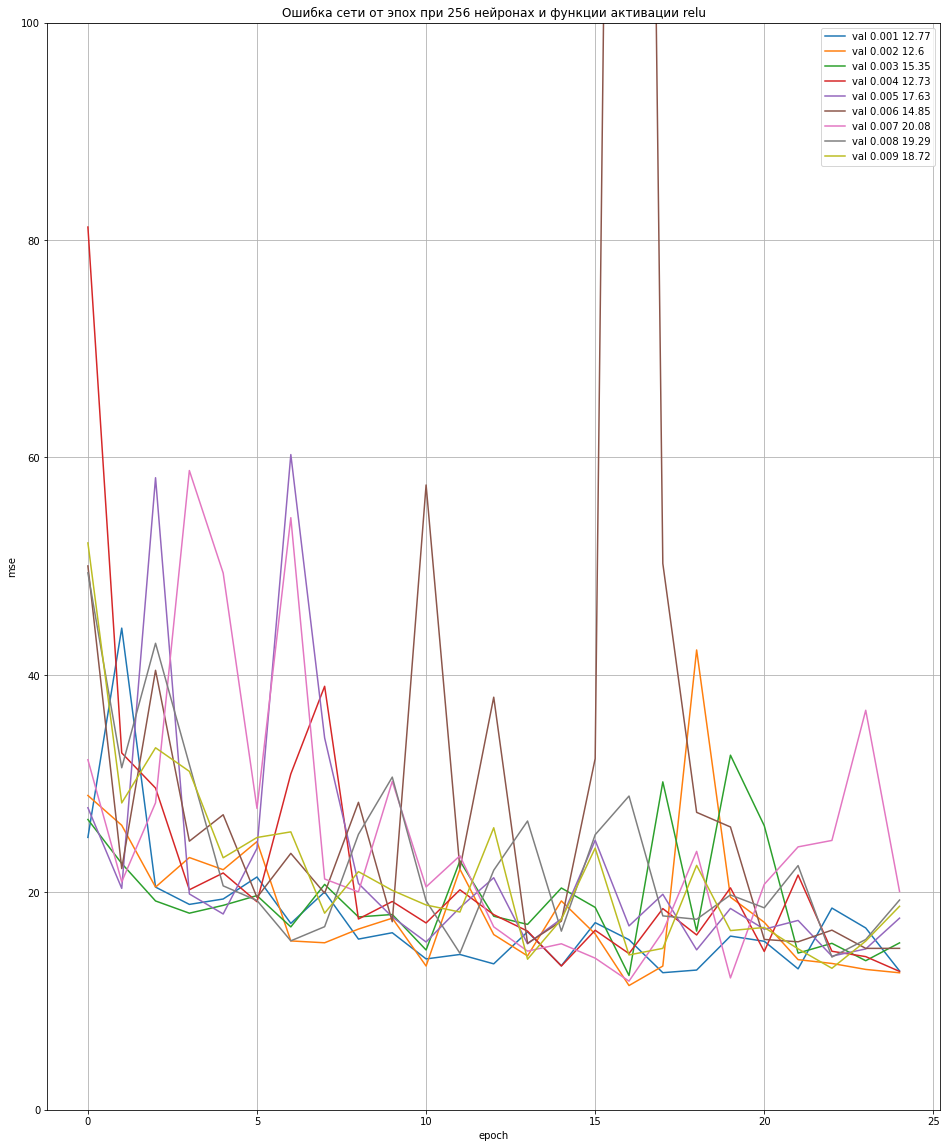

In [30]:
plt.figure(figsize=(16, 20))
plt.title(f'Ошибка сети от эпох при 256 нейронах и функции активации relu')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.grid()


for learning_rate in np.arange(1e-3,1e-2,1e-3):  
    inputs = Input(shape=(13,))
    x=Flatten()(inputs)
    for i in range(8):
        x=Dense(256, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=learning_rate), loss='mse', metrics=['mse'])

    print(f'___________________________________________________', 
          f'\nLayers: 12,',
          f'\nneurons: 128,',
          f'\nactivation function: relu',
          f'\noptimizer: Nadam',
          f'\nlearning_rate:{learning_rate}')

    history = model.fit(X_train, y_train, epochs=25, batch_size=batch_size, 
                        validation_data=(X_test, y_test), verbose=0)

    train_loss, train_m = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_m = model.evaluate(X_test, y_test, verbose=0)

    plt.ylim(0, 100)
    plt.plot(history.history['val_mse'], label=f'val {round(learning_rate,3)} {round(test_m,2)}')
    #plt.plot(history.history['mse'], label=f'train {learning_rate} {round(train_m,2)}')
    plt.legend()
    
plt.show()

In [32]:
inputs = Input(shape=(13,))
x=Flatten()(inputs)
for i in range(8):
    x=Dense(256, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=2e-3), loss='mse', metrics=['mse'])

model.summary()

history = model.fit(X_train, y_train, epochs=25, batch_size=batch_size, 
                        validation_data=(X_test, y_test), verbose=1)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Коэффициент детерминации на тренировочной выборке: {round(r2_train,2)}')
print(f'Коэффициент детерминации на тестовой выборке: {round(r2_test,2)}')

Model: "model_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_121 (InputLayer)      [(None, 13)]              0         
                                                                 
 flatten_122 (Flatten)       (None, 13)                0         
                                                                 
 dense_1253 (Dense)          (None, 256)               3584      
                                                                 
 dense_1254 (Dense)          (None, 256)               65792     
                                                                 
 dense_1255 (Dense)          (None, 256)               65792     
                                                                 
 dense_1256 (Dense)          (None, 256)               65792     
                                                                 
 dense_1257 (Dense)          (None, 256)               65

In [33]:
print(f'R^2 для тестовой выбоки:{round(r2_test,2)*100}%')

R^2 для тестовой выбоки:86.0%


#### Попробуем улучшить модель с помощью ансамбля сетей

In [150]:
batch_size = 59

inputs1 = Input(shape=(13,))
x=Flatten()(inputs1)
for i in range(8):
    x=Dense(256, activation='relu')(x)
outputs1 = Dense(1)(x)
model1 = Model(inputs=inputs1, outputs=outputs1)

x=Flatten()(inputs1)
for i in range(8):
    x=Dense(256, activation='relu')(x)
outputs2 = Dense(1)(x)
model2 = Model(inputs=inputs1, outputs=outputs2)


x=Flatten()(inputs1)
for i in range(18):
    x=Dense(64, activation='relu')(x)
outputs3 = Dense(1)(x)
model3 = Model(inputs=inputs1, outputs=outputs3)

model1.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=2e-3), loss='mse', metrics=['mse'])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mse'])
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=4e-3), loss='mse', metrics=['mse'])

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=batch_size, 
                        validation_data=(X_test, y_test), validation_split=0.2, verbose=1)
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=batch_size, 
                        validation_data=(X_test, y_test), validation_split=0.2, verbose=1)
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=batch_size, 
                        validation_data=(X_test, y_test), validation_split=0.2, verbose=1)

out_all = Average()([model1.output, model2.output, model3.output])
out_all = Dense(1)(out_all)

model_all = Model(inputs=inputs1, outputs=out_all)
model_all.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3), loss='mse', metrics=['mse'])

history_all = model_all.fit(X_train, y_train, epochs=50, batch_size=batch_size, 
                        validation_data=(X_test, y_test), validation_split=0.2, verbose=1)

Epoch 1/50
6/6 [==============================] - 3s 49ms/step - loss: 406.7755 - mse: 406.7755 - val_loss: 186.1767 - val_mse: 186.1767
Epoch 2/50
6/6 [==============================] - 0s 21ms/step - loss: 114.8116 - mse: 114.8116 - val_loss: 44.2400 - val_mse: 44.2400
Epoch 3/50
6/6 [==============================] - 0s 24ms/step - loss: 38.2106 - mse: 38.2106 - val_loss: 31.3323 - val_mse: 31.3323
Epoch 4/50
6/6 [==============================] - 0s 23ms/step - loss: 19.5598 - mse: 19.5598 - val_loss: 31.0856 - val_mse: 31.0856
Epoch 5/50
6/6 [==============================] - 0s 21ms/step - loss: 16.8194 - mse: 16.8194 - val_loss: 37.8609 - val_mse: 37.8609
Epoch 6/50
6/6 [==============================] - 0s 21ms/step - loss: 14.6103 - mse: 14.6103 - val_loss: 26.9869 - val_mse: 26.9869
Epoch 7/50
6/6 [==============================] - 0s 22ms/step - loss: 13.1026 - mse: 13.1026 - val_loss: 22.4094 - val_mse: 22.4094
Epoch 8/50
6/6 [==============================] - 0s 23ms/step 

Epoch 13/50
6/6 [==============================] - 0s 21ms/step - loss: 10.0730 - mse: 10.0730 - val_loss: 22.0202 - val_mse: 22.0202
Epoch 14/50
6/6 [==============================] - 0s 21ms/step - loss: 9.0065 - mse: 9.0065 - val_loss: 21.1989 - val_mse: 21.1989
Epoch 15/50
6/6 [==============================] - 0s 20ms/step - loss: 8.7517 - mse: 8.7517 - val_loss: 20.5048 - val_mse: 20.5048
Epoch 16/50
6/6 [==============================] - 0s 19ms/step - loss: 8.6668 - mse: 8.6668 - val_loss: 18.8850 - val_mse: 18.8850
Epoch 17/50
6/6 [==============================] - 0s 21ms/step - loss: 7.4824 - mse: 7.4824 - val_loss: 18.8003 - val_mse: 18.8003
Epoch 18/50
6/6 [==============================] - 0s 27ms/step - loss: 6.6660 - mse: 6.6660 - val_loss: 18.1029 - val_mse: 18.1029
Epoch 19/50
6/6 [==============================] - 0s 23ms/step - loss: 6.3983 - mse: 6.3983 - val_loss: 17.5492 - val_mse: 17.5492
Epoch 20/50
6/6 [==============================] - 0s 26ms/step - loss: 6.

Epoch 25/50
6/6 [==============================] - 0s 11ms/step - loss: 5.1503 - mse: 5.1503 - val_loss: 15.6731 - val_mse: 15.6731
Epoch 26/50
6/6 [==============================] - 0s 13ms/step - loss: 4.0530 - mse: 4.0530 - val_loss: 14.9305 - val_mse: 14.9305
Epoch 27/50
6/6 [==============================] - 0s 12ms/step - loss: 4.4086 - mse: 4.4086 - val_loss: 14.3291 - val_mse: 14.3291
Epoch 28/50
6/6 [==============================] - 0s 11ms/step - loss: 4.4840 - mse: 4.4840 - val_loss: 13.5919 - val_mse: 13.5919
Epoch 29/50
6/6 [==============================] - 0s 12ms/step - loss: 3.9827 - mse: 3.9827 - val_loss: 14.1724 - val_mse: 14.1724
Epoch 30/50
6/6 [==============================] - 0s 11ms/step - loss: 3.4706 - mse: 3.4706 - val_loss: 13.2288 - val_mse: 13.2288
Epoch 31/50
6/6 [==============================] - 0s 11ms/step - loss: 3.2852 - mse: 3.2852 - val_loss: 13.5467 - val_mse: 13.5467
Epoch 32/50
6/6 [==============================] - 0s 11ms/step - loss: 3.10

Epoch 37/50
6/6 [==============================] - 0s 39ms/step - loss: 1.7992 - mse: 1.7992 - val_loss: 12.4165 - val_mse: 12.4165
Epoch 38/50
6/6 [==============================] - 0s 36ms/step - loss: 1.2403 - mse: 1.2403 - val_loss: 13.4133 - val_mse: 13.4133
Epoch 39/50
6/6 [==============================] - 0s 36ms/step - loss: 1.2787 - mse: 1.2787 - val_loss: 12.1640 - val_mse: 12.1640
Epoch 40/50
6/6 [==============================] - 0s 36ms/step - loss: 1.0377 - mse: 1.0377 - val_loss: 12.6512 - val_mse: 12.6512
Epoch 41/50
6/6 [==============================] - 0s 34ms/step - loss: 0.9967 - mse: 0.9967 - val_loss: 12.3428 - val_mse: 12.3428
Epoch 42/50
6/6 [==============================] - 0s 32ms/step - loss: 1.5993 - mse: 1.5993 - val_loss: 16.9902 - val_mse: 16.9902
Epoch 43/50
6/6 [==============================] - 0s 29ms/step - loss: 2.0487 - mse: 2.0487 - val_loss: 12.4323 - val_mse: 12.4323
Epoch 44/50
6/6 [==============================] - 0s 33ms/step - loss: 1.35

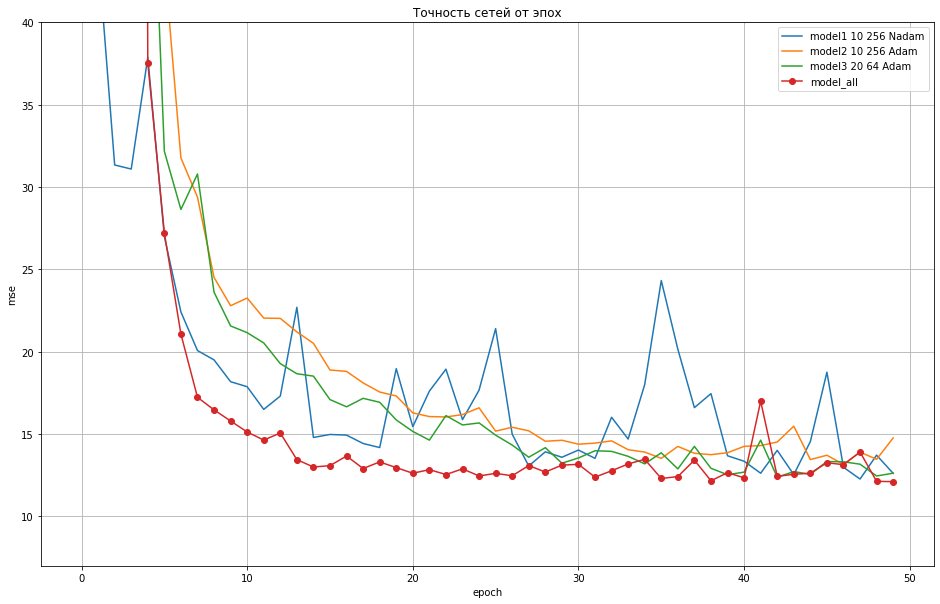

In [151]:
plt.figure(figsize=(16, 10))
plt.title(f'Точность сетей от эпох')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.grid()
plt.ylim(7, 40)
plt.plot(history1.history['val_mse'], label=f'model1 10 256 Nadam')
plt.plot(history2.history['val_mse'], label=f'model2 10 256 Adam')
plt.plot(history3.history['val_mse'], label=f'model3 20 64 Adam')
plt.plot(history_all.history['val_mse'], '-o', label=f'model_all')
plt.legend()
plt.show()

In [152]:
y_train_pred = model_all.predict(X_train)
y_test_pred = model_all.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'\n\nКоэффициент детерминации на тренировочной выборке: {round(r2_train,2)}')
print(f'Коэффициент детерминации на тестовой выборке: {round(r2_test,2)}')

5/5 [==============================] - 0s 5ms/step


Коэффициент детерминации на тренировочной выборке: 0.99
Коэффициент детерминации на тестовой выборке: 0.85


#### Улучшения не достигли, будем считать R^2 для тестовой выбоки:86.0% оптимальным значением. Достигается оно при использовании модели cо следующими параметрами


In [153]:
result.head(1)

,layers,num_neuron,activation_func,optimizer,train_mse,test_mse,test_train
56,10,256,relu,Nadam,2.881667,10.941353,8.059685


#### Для задач регрессии оптимально выбирать функцию активации "relu", так как она не подвержена сильно эффекту исчезновения градиента и не так сильно "шумит" как "tanh"

#### Из оптимизаторов лучше всего себя показал "Nadam", это по сути тот же "Adam", только с импулсом Нестерова. И "Adam" — это метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.
#### Согласно Kingma et al., 2014, этот метод «эффективен в вычислительном отношении, требует мало памяти, инвариантен к диагональному масштабированию градиентов и хорошо подходит для задач, больших с точки зрения данных / параметров».
#### По сути "Adam" является RMSprop с импульсом.